In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing
from gensim.models import Word2Vec
import seaborn as sns
import jieba
import re
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### 01.读取数据

In [18]:
hole_df = pd.read_csv("../data/2023-06-08_holes_day.csv", index_col=0)
hole_df.dropna(inplace=True)
hole_df.shape

(69023, 6)

In [19]:
hole_df

,text,type,time,reply,likenum,last_retrive
pid,,,,,,
5073185,盒子空间旅店差评😡，没有台灯，怎么和npy好好学习？,text,2023-05-19 22:22:26,5.0,3.0,2023-06-09 03:16:13
5073186,新冠完全恢复后，平静心率反而更低了，原来是72-68，现在是60-65的样子,text,2023-05-19 22:22:33,0.0,0.0,2023-06-09 03:16:13
5073187,有没有朋友上过王子睿托福口语的？有没有还在课程有效期内的我出点米你分享给我呢◉⁠‿⁠◉,text,2023-05-19 22:22:56,0.0,0.0,2023-06-09 03:16:13
5073188,学校没有刷夜地太不爽了🥲,text,2023-05-19 22:23:04,6.0,2.0,2023-06-09 03:16:13
5073189,在校内如果打了第一针hpv但是没约到第二针怎么办呀,text,2023-05-19 22:23:51,1.0,2.0,2023-06-09 03:16:13
...,...,...,...,...,...,...
5144735,问问大家缓训一般怎么样的理由会通过呢？\r\ndz很坚定想要缓训\r\ndz一个是实习有个项...,text,2023-06-08 22:24:39,2.0,3,2023-06-08 22:25:58
5144737,想求一份fw 社会心理学/社心往年题 可有偿 感谢好心人,text,2023-06-08 22:25:19,0.0,1,2023-06-08 22:25:58
5144738,这是？,image,2023-06-08 22:25:32,0.0,1,2023-06-08 22:25:58


In [20]:
hole_df['reply'] = hole_df.reply.astype(float)
hole_df['likenum'] = hole_df.likenum.astype(float)

In [21]:
hole_df['hot'] = hole_df.likenum*hole_df.reply

In [22]:
hole_df.sort_values('hot').tail(20)

,text,type,time,reply,likenum,last_retrive,hot
pid,,,,,,,
5114011,哲学系 20级的同学們\r\n保研准备去哪呢、、,text,2023-05-31 11:07:23,70.0,73.0,2023-06-09 00:29:40,5110.0
5139468,每当高考的时候，如果批判高考应试教育弊端，都会有人说高考给了平民机会翻身，我其实很不赞同这样...,text,2023-06-07 15:42:44,120.0,45.0,2023-06-08 22:46:19,5400.0
5105816,24届法硕求职进度贴，供25届及之后参考（之前在研一暑假和研二寒假分别发过2个贴，现在来更新...,text,2023-05-29 00:49:21,46.0,128.0,2023-06-09 01:04:08,5888.0
5128617,大家可以说一下自己的家庭年收入和选择的专业吗 现在好迷茫,text,2023-06-04 19:59:04,78.0,81.0,2023-06-08 23:30:47,6318.0
5095042,最近觉得，男性在健康的亲密关系里主要的驱动力应该是性和性幻想，性是最强也最简单也最真实的驱力...,text,2023-05-26 01:00:43,143.0,45.0,2023-06-09 01:48:59,6435.0
5133512,大四老狗，马上要离开燕园了，开个洞给打算申请国外学校理工科phd的学弟学妹们答疑解惑，顺带攒...,text,2023-06-06 00:00:02,49.0,141.0,2023-06-08 23:10:49,6909.0
5097003,哲学系/哲系 低年级 很想多读会儿哲学 想走学术但觉得自己做不到 可能自怨自艾和自我怀疑就是...,text,2023-05-26 17:12:46,120.0,61.0,2023-06-09 01:40:50,7320.0
5074758,#5074559\n#家园 #占座\n大家好 我是这次占座的直接责任人\n这次占座不是因为聚...,text,2023-05-20 12:51:52,87.0,88.0,2023-06-09 03:10:11,7656.0
5135551,原洞“5128154”\r\n来搬运整理的无偿分享资料了（来自赛艇/肥猴/同学分享），希望得...,text,2023-06-06 15:54:40,34.0,232.0,2023-06-08 23:01:53,7888.0


In [23]:
hole_df.loc[:,'hour'] = hole_df.time.apply(lambda x: x.split()[1].split(':')[0]).astype(int)

In [24]:
hole_df.groupby('hour').count().text

hour
0     3684
1     2299
2     1124
3      512
4      266
5      139
6      176
7      475
8     1386
9     2566
10    3638
11    3899
12    3856
13    3827
14    3787
15    4091
16    4107
17    4149
18    4032
19    4089
20    4321
21    4105
22    4119
23    4376
Name: text, dtype: int64

<Axes: xlabel='hour', ylabel='text'>

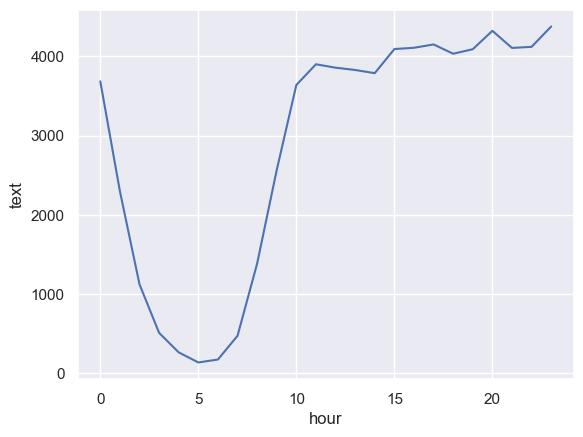

In [25]:
sns.set()
sns.lineplot(hole_df.groupby('hour').count().text)

<Axes: xlabel='hour', ylabel='hot'>

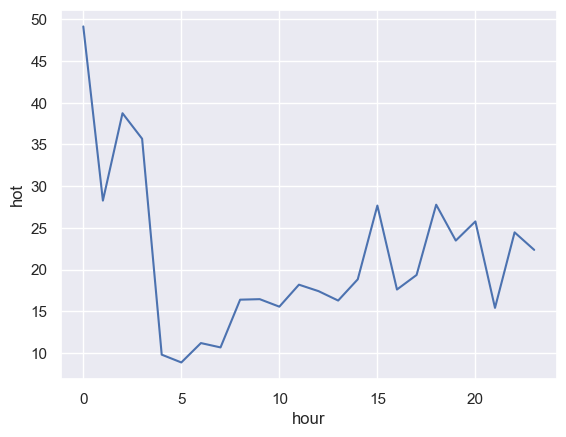

In [26]:
sns.lineplot(hole_df.groupby('hour').hot.mean())

In [27]:
# hole_df = hole_df[hole_df['hot'] != 0]

In [28]:
from tqdm import tqdm
tqdm.pandas()

#由于筛出来太多无意义停止词，所以加入停止词表 https://raw.githubusercontent.com/goto456/stopwords/master/baidu_stopwords.txt
with open("baidu_stopwords.txt") as f:
    stop_word_list = f.read().splitlines()
useless_str = '''一！“”，。？、；’"',.、·《》（）()#\t：\n\r\n/'''

words = hole_df['text'].progress_apply(lambda x: ' '.join([x for x in jieba.cut(x) if x not in stop_word_list and x not in useless_str]))
hole_df['raw_text'] = hole_df['text'].copy()
hole_df['text'] = words

100%|██████████| 69023/69023 [00:23<00:00, 2913.20it/s]


In [29]:
# filter
# hole_df = hole_df.loc[(hole_df.hour<=2) | (hole_df.hour>=23),:]

In [33]:
hole_df.loc[:,'hot_norm'] = hole_df.hot.apply(lambda x: x if x==0 else np.log(x))
hole_df.loc[:,'hot_norm'] = hole_df.hot_norm.apply(lambda x: x if x!=0 else 0.1)

In [36]:
hot_hole = hole_df[hole_df.hot_norm>1]
hot_hole.shape

(30741, 10)

In [42]:
tfi_hole_adj = pd.concat([hole_df, hot_hole, hot_hole], ignore_index=True)

In [43]:
tfidf = TfidfVectorizer()
tfidf_vec = tfidf.fit_transform(tfi_hole_adj['text'])

In [44]:
# Get the feature names from the vectorizer
feature_names = tfidf.get_feature_names_out()

# Get the sum of the tf-idf values for each feature across all documents
sum_tfidf = np.sum(tfidf_vec.toarray(), axis=0)

# Get the indices of the features sorted by their tf-idf sum in descending order
sorted_indices = np.argsort(sum_tfidf)[::-1]

# Print the top 10 features and their tf-idf sums
print("Top 10 features and their tf-idf sums")
for i in range(10):
    feature_index = sorted_indices[i]
    feature_name = feature_names[feature_index]
    tfidf_sum = sum_tfidf[feature_index]
    print(f"{feature_name}: {tfidf_sum}")

Top 10 features and their tf-idf sums
dz: 1238.8299139489616
真的: 1090.3386823971073
感觉: 1086.8210223874867
popi: 1059.2453867505146
求问: 1043.8506202268507
喜欢: 1033.4797703348204
有没有: 1002.5730771788578
啊啊啊: 900.3927121351564
老师: 845.7065434086257
同学: 812.9270414014621


In [227]:
# Word2Vec vectorization for segmented '简介'
sentences = [s.split() for s in hole_df['text']]

seed = 123
w2v = Word2Vec(sentences, vector_size=10, min_count=1, workers=4, seed=seed) # size is the dimensionality of the feature vectors

In [256]:
for e in w2v.wv.most_similar(positive=['食堂'], topn=10):
   print(e[0], e[1])

人儿 0.9705359935760498
hhhhhhh 0.9624481201171875
露天 0.9609062075614929
燕南 0.9608502388000488
外边 0.9600920081138611
带娃 0.9579737782478333
图书馆 0.9574892520904541
烤鱼 0.9540224075317383
qq1739997993 0.9527508020401001
辞仙 0.948861837387085


In [229]:
# We first tokenize each sentence in the storyline column
tokenized_sentences = hole_df.text.apply(lambda x: x.split())

# We then calculate the word vectors for each word in each sentence
word_vectors = tokenized_sentences.apply(lambda x: np.array([w2v.wv[word] for word in x if word in w2v.wv.key_to_index]))

# We then calculate the average vector for each sentence
sentence_vectors = word_vectors.apply(lambda x: np.mean(x, axis=0)) 

# The resulting sentence_vectors will contain the vector representation for each sentence in the storyline column.
sentence_vectors

pid
5073185    [-0.7373281, 0.047646277, -1.8856795, -0.44116...
5073186    [-0.61578065, 0.5757293, -1.7672215, -2.583053...
5073187    [-0.37444735, 0.2531121, -1.0534188, -1.003396...
5073188    [-1.3290275, 0.06383667, -2.4700248, -0.235180...
5073189    [-0.7856104, 0.808041, -0.855408, -1.4976491, ...
                                 ...                        
5144735    [-0.13692066, -0.097556174, -2.8703856, -1.470...
5144737    [-0.28404588, 3.1706138, -1.189102, -0.8786449...
5144738    [-1.5995816, 0.05253653, -3.1336095, -0.980413...
5144739    [-1.5261736, 0.37707373, -1.1457825, -0.615399...
5144741    [-1.6070571, -0.660248, -3.7599175, 0.30218354...
Name: text, Length: 68888, dtype: object

In [265]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()


X.toarray()

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

In [230]:
w2v_sentence_vectors = np.stack(np.array(sentence_vectors))

In [231]:
w2v_sentence_vectors.shape

(68888, 10)

In [232]:
hole_df

,text,type,time,reply,likenum,last_retrive,hot,hour,raw_text
pid,,,,,,,,,
5073185,盒子 空间 旅店 差评 😡 台灯 npy 好好学习,text,2023-05-19 22:22:26,5.0,3.0,2023-06-09 03:16:13,15.0,22,盒子空间旅店差评😡，没有台灯，怎么和npy好好学习？
5073186,新冠 完全恢复 后 平静 心率 反而 更 低 72 - 68 60 - 65 样子,text,2023-05-19 22:22:33,0.0,0.0,2023-06-09 03:16:13,0.0,22,新冠完全恢复后，平静心率反而更低了，原来是72-68，现在是60-65的样子
5073187,有没有 朋友 上 王子 睿 托福 口语 有没有 还 课程 有效期 内 出点 米 分享 ◉ ⁠...,text,2023-05-19 22:22:56,0.0,0.0,2023-06-09 03:16:13,0.0,22,有没有朋友上过王子睿托福口语的？有没有还在课程有效期内的我出点米你分享给我呢◉⁠‿⁠◉
5073188,学校 刷夜 太 不爽 🥲,text,2023-05-19 22:23:04,6.0,2.0,2023-06-09 03:16:13,12.0,22,学校没有刷夜地太不爽了🥲
5073189,校内 第一 针 hpv 没约 第二 针,text,2023-05-19 22:23:51,1.0,2.0,2023-06-09 03:16:13,2.0,22,在校内如果打了第一针hpv但是没约到第二针怎么办呀
...,...,...,...,...,...,...,...,...,...
5144735,问问 缓训 理由 会 dz 很 坚定 想要 缓训 dz 实习 有个 项目 六月 末 拖 公司...,text,2023-06-08 22:24:39,2.0,3.0,2023-06-08 22:25:58,6.0,22,问问大家缓训一般怎么样的理由会通过呢？\r\ndz很坚定想要缓训\r\ndz一个是实习有个项...
5144737,想求 一份 fw 社会心理学 社心 往年 题 有偿 感谢 好心人,text,2023-06-08 22:25:19,0.0,1.0,2023-06-08 22:25:58,0.0,22,想求一份fw 社会心理学/社心往年题 可有偿 感谢好心人
5144738,这是,image,2023-06-08 22:25:32,0.0,1.0,2023-06-08 22:25:58,0.0,22,这是？


In [238]:
hole_df.loc[:,'hour_6am'] = hole_df.hour.apply(lambda x: x-6 if x-6 >= 0 else x-6+24)

In [239]:
train_data = np.array(hole_df[['reply', 'likenum', 'hour_6am']])
train_data = np.hstack([train_data, w2v_sentence_vectors])
train_data.shape

(68888, 13)

In [240]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
pca_train = PCA(n_components=0.95)
train_data_pca = pca_train.fit_transform(train_data)

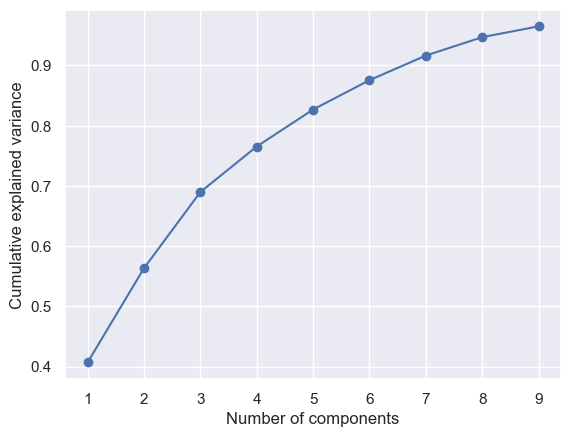

In [241]:
# plot the scree plot
plt.plot(range(1, pca_train.n_components_ + 1), pca_train.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

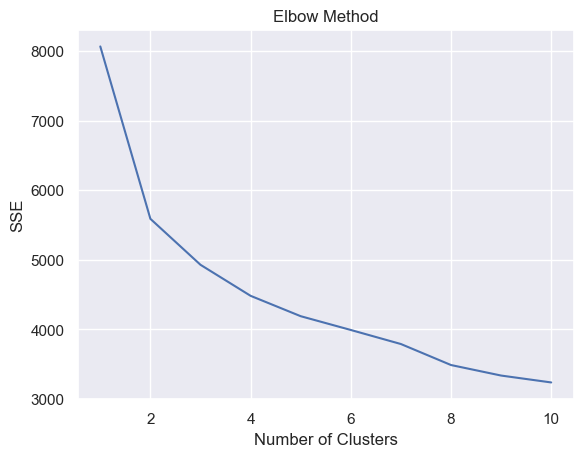

In [249]:
# Task 3: K-means clustering

# Elbow method to determine optimal number of clusters
# Calculate the sum of squared errors for different values of k
# Choose the value of k at the "elbow" of the plot
# This is the point of diminishing returns, where adding more clusters doesn't significantly improve the SSE
# Set the value of k to the optimal number of clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate SSE for different values of k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(train_data_pca)
    sse.append(kmeans.inertia_)

# Plot SSE against number of clusters
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Set the value of k to the optimal number of clusters
k = 30

# Perform K-means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=k, random_state=114514, n_init='auto')
kmeans.fit_transform(train_data_pca)
# Use the trained KMeans model to predict the cluster labels for the test data
labels = kmeans.labels_


In [250]:
# Create a dictionary to store the holes in each cluster
cluster_holes = {}
for i in range(k):
    cluster_holes[i] = []

# Iterate through the test data and add each movie to its corresponding cluster
for i in range(len(train_data_pca)):
    cluster_holes[labels[i]].append(hole_df.iloc[i])

# Output representative movies, number of movies in each cluster, and rating distribution
cluster_avg_hour_6am = []
cluster_avg_like = []
cluster_avg_reply = []
for i in range(k):
    print("====================")
    print(f"Cluster {i+1}:")
    print(f"Number of holes in cluster: {len(cluster_holes[i])}")
    print(f"Avg time(start at 6am) {hole_df[labels == i]['hour_6am'].mean()}")
    cluster_avg_hour_6am.append(hole_df[labels == i]['hour_6am'].mean())
    print(f"Like mean: {hole_df[labels == i]['likenum'].mean()}")
    cluster_avg_like.append(hole_df[labels == i]['likenum'].mean())
    print(f"Reply mean: {hole_df[labels == i]['reply'].mean()}")
    cluster_avg_reply.append(hole_df[labels == i]['reply'].mean())
    # Print the tags for each movie in the cluster
    print(f"Text for hole: {hole_df[labels == i]['raw_text'].sample(10)}")

    print("\n")

Cluster 1:
Number of holes in cluster: 4439
Avg time(start at 6am) 14.014642937598559
Like mean: 2.3016445145302997
Reply mean: 5.064879477359765
Text for hole: pid
5119822                  明明自己能力没那么强，却经常由于自视甚高而陷入反复的懊恼😔我该怎么办😔
5133202                                                美女在哪？
5132357                             思修没有课上对pre的提问发言对分数的影响大吗？
5132134                                普通感冒能申请缓考吗 真的好难受 头痛欲裂
5132847                                         图形学，我想说，别开了😅
5144376                    中东 我太爱王老师了，期末布置的真的没难度又有意思，写起来非常爽！
5108785                                       哈哈哈树洞论文浓度upppp
5098087                               感觉自己要感冒了啊啊头疼鼻塞，应该吃什么药呢
5132957    人活的久啥都能遇到\r\n就比如大纲写的开卷今天要不是学生问还不说变成什么开闭卷不定\r\n...
5097621    为什么室友要在宿舍打几个小时的电话…能不能滚出去打啊…不是不让打电话但是打几个小时是不是真的...
Name: raw_text, dtype: object


Cluster 2:
Number of holes in cluster: 2428
Avg time(start at 6am) 4.576606260296541
Like mean: 1.6474464579901154
Reply mean: 2.845551894563427
Text for hole: pid
5084697     非信徒中午可以在佟园吃饭吗？\n刚

In [4]:
import pandas as pd
import sqlite3

In [6]:
db_path = '../data/2023-06-13_holes_day.db'
with sqlite3.connect(db_path) as conn:
    data = pd.read_sql("SELECT * FROM comments", conn)

In [7]:
from tqdm import tqdm
tqdm.pandas()

#由于筛出来太多无意义停止词，所以加入停止词表 https://raw.githubusercontent.com/goto456/stopwords/master/baidu_stopwords.txt
with open("baidu_stopwords.txt") as f:
    stop_word_list = f.read().splitlines()
useless_str = '''一！“”，。？、；’"',.、·《》（）()#\t：\n\r\n/'''

words = data['text'].progress_apply(lambda x: ' '.join([x for x in jieba.cut(x) if x not in stop_word_list and x not in useless_str]))
data['raw_text'] = data['text'].copy()
data['text'] = words

  0%|          | 0/13440 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/7b/v1b09kkd347gt34f9jz_bst00000gn/T/jieba.cache
Loading model cost 0.368 seconds.
Prefix dict has been built successfully.
100%|██████████| 13440/13440 [00:02<00:00, 5757.81it/s]


In [8]:
data

,cid,pid,text,name,time,comment_id,last_retrive,raw_text
0,23293768,5160815,笑,Alice,2023-06-13 02:07:17,None,2023-06-13 22:50:06,？这是能笑的吗
1,23293769,5160816,好 崩溃 地府 爆,洞主,2023-06-13 02:07:24,None,2023-06-13 22:50:07,好崩溃，和地府爆了
2,23293770,5160817,贵性,Alice,2023-06-13 02:07:25,nan,2023-06-13 22:50:07,贵性
3,23293771,5160817,留,Bob,2023-06-13 02:07:25,nan,2023-06-13 22:50:07,留？
4,23293773,5160818,女,洞主,2023-06-13 02:07:43,nan,2023-06-13 22:50:08,并且是女
...,...,...,...,...,...,...,...,...
13435,23309988,5161212,都 写 暑假,洞主,2023-06-13 22:31:46,23295559.0,2023-06-13 22:48:24,所有的几乎都写的整个暑假
13436,23310156,5161267,◞ ‸ ◟ 😭 😭 😭 😭 😭 😭 😭 😭 😭 😭 😭 😭 😭,Hans,2023-06-13 22:40:21,nan,2023-06-13 22:48:48,(◞‸◟ )😭😭😭😭😭😭😭😭😭😭😭😭😭
13437,23310186,5160891,啊啊啊 啊啊啊 啊啊啊 善人 3627479540,洞主,2023-06-13 22:41:21,23307735.0,2023-06-13 22:50:41,啊啊啊啊啊啊啊啊啊善人！！\n3627479540
13438,23310260,5161267,看起来 都 期末 寄 苦恼 耶 🤔 🧚 ‍ ♀ ️ 哭哭 大军 😭 😭 😭 😭 复习 不 完...,Isabella,2023-06-13 22:43:56,nan,2023-06-13 22:48:48,看起来大家都在为期末寄苦恼耶🤔\n🧚‍♀️也加入哭哭大军😭😭😭😭（复习不完啦！复习不完啦！😭😭）


In [10]:
tfidf = TfidfVectorizer()
tfidf_vec = tfidf.fit_transform(data['text'])

# Get the feature names from the vectorizer
feature_names = tfidf.get_feature_names_out()

# Get the sum of the tf-idf values for each feature across all documents
sum_tfidf = np.sum(tfidf_vec.toarray(), axis=0)

# Get the indices of the features sorted by their tf-idf sum in descending order
sorted_indices = np.argsort(sum_tfidf)[::-1]

# Print the top 10 features and their tf-idf sums
print("Top 10 features and their tf-idf sums")
for i in range(10):
    feature_index = sorted_indices[i]
    feature_name = feature_names[feature_index]
    tfidf_sum = sum_tfidf[feature_index]
    print(f"{feature_name}: {tfidf_sum}")

Top 10 features and their tf-idf sums
dz: 241.57852928162438
谢谢: 221.41215637670797
呜呜: 137.85239442617348
老师: 121.15287818045991
啊啊啊: 114.08776414414794
真的: 112.43939105179082
感觉: 105.96843038917807
哈哈哈: 82.02643368147517
确实: 74.08741461404124
复习: 66.16669029718322


In [12]:
# Word2Vec vectorization for segmented '简介'
sentences = [s.split() for s in data['text']]

seed = 123
w2v = Word2Vec(sentences, vector_size=10, min_count=1, workers=4, seed=seed) # size is the dimensionality of the feature vectors